In [2]:
# 先检查您的.mat文件是什么格式
import scipy.io

mat_file = './Batch_3115_Label_6_Frame_59/MTD_Result.mat'

try:
    # 尝试用scipy读取
    data = scipy.io.loadmat(mat_file)
    print("✓ 这是传统格式的.mat文件，可以用scipy.io读取")
    print("文件中的变量:")
    for key in data.keys():
        if not key.startswith('__'):
            print(f"  {key}: {data[key].shape if hasattr(data[key], 'shape') else type(data[key])}")
except:
    print("✗ scipy.io无法读取，可能是MATLAB v7.3格式，需要h5py")
    
    # 尝试用h5py读取
    try:
        import h5py
        with h5py.File(mat_file, 'r') as f:
            print("✓ 这是HDF5格式的.mat文件，需要用h5py读取")
            print("文件中的变量:")
            for key in f.keys():
                print(f"  {key}: {f[key].shape if hasattr(f[key], 'shape') else type(f[key])}")
    except ImportError:
        print("需要安装h5py: pip install h5py")
    except Exception as e:
        print(f"h5py也无法读取: {e}")

✓ 这是传统格式的.mat文件，可以用scipy.io读取
文件中的变量:
  data_proc_MTD_result: (31, 360)


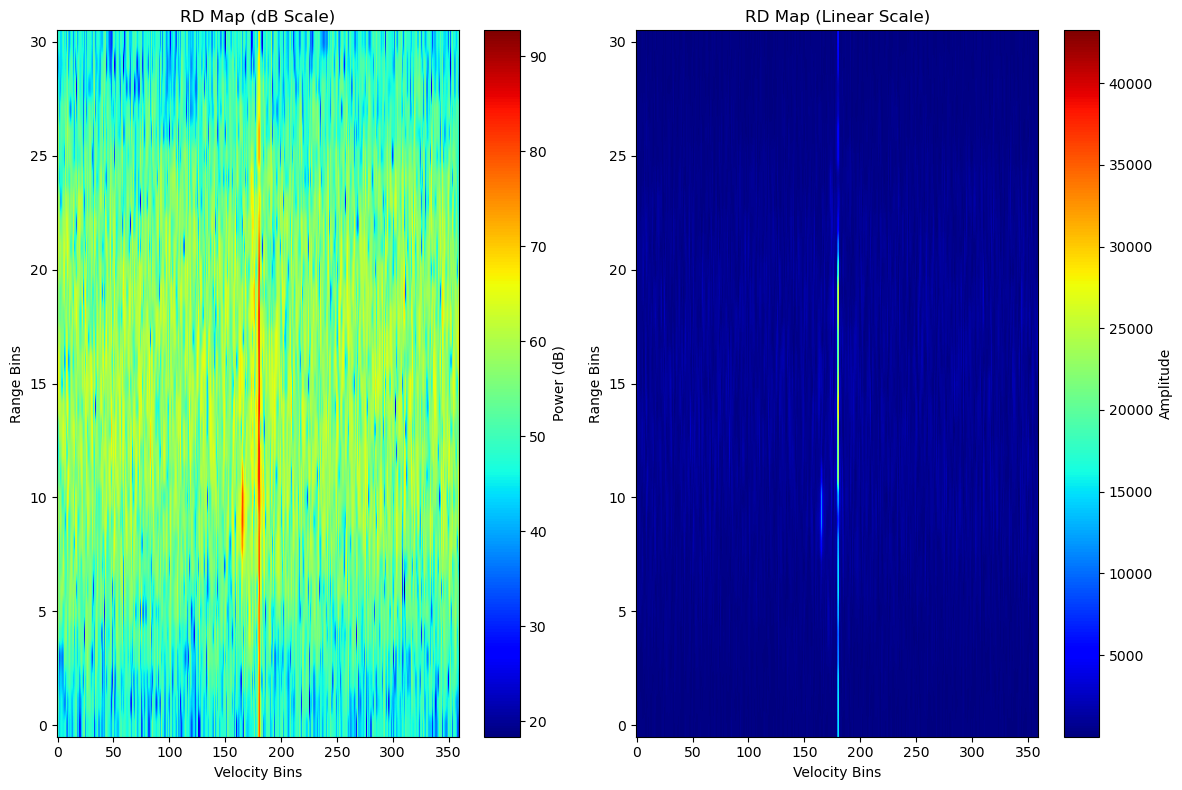

数据形状: (31, 360)
数据类型: complex128
最大幅度: 43229.14
平均幅度: 667.11


In [3]:
# 使用您已有的scipy方法，这是正确的
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

# 加载数据
mat_file = './Batch_3115_Label_6_Frame_59/MTD_Result.mat'
data = scipy.io.loadmat(mat_file)
mtd_data = data['data_proc_MTD_result']

# 生成RD图
plt.figure(figsize=(12, 8))

# 方法1：对数刻度显示
plt.subplot(1, 2, 1)
power_db = 20 * np.log10(np.abs(mtd_data) + 1e-10)
plt.imshow(power_db, aspect='auto', cmap='jet', origin='lower')
plt.colorbar(label='Power (dB)')
plt.xlabel('Velocity Bins')
plt.ylabel('Range Bins')
plt.title('RD Map (dB Scale)')

# 方法2：线性刻度显示
plt.subplot(1, 2, 2)
plt.imshow(np.abs(mtd_data), aspect='auto', cmap='jet', origin='lower')
plt.colorbar(label='Amplitude')
plt.xlabel('Velocity Bins')
plt.ylabel('Range Bins')
plt.title('RD Map (Linear Scale)')

plt.tight_layout()
plt.show()

# 打印数据统计信息
print(f"数据形状: {mtd_data.shape}")
print(f"数据类型: {mtd_data.dtype}")
print(f"最大幅度: {np.max(np.abs(mtd_data)):.2f}")
print(f"平均幅度: {np.mean(np.abs(mtd_data)):.2f}")

In [ ]:
# 先检查您的.mat文件是什么格式
import scipy.io

mat_file = './Batch_3115_Label_6_Frame_59/MTD_Result.mat'

try:
    # 尝试用scipy读取
    data = scipy.io.loadmat(mat_file)
    print("✓ 这是传统格式的.mat文件，可以用scipy.io读取")
    print("文件中的变量:")
    for key in data.keys():
        if not key.startswith('__'):
            print(f"  {key}: {data[key].shape if hasattr(data[key], 'shape') else type(data[key])}")
except:
    print("✗ scipy.io无法读取，可能是MATLAB v7.3格式，需要h5py")
    
    # 尝试用h5py读取
    try:
        import h5py
        with h5py.File(mat_file, 'r') as f:
            print("✓ 这是HDF5格式的.mat文件，需要用h5py读取")
            print("文件中的变量:")
            for key in f.keys():
                print(f"  {key}: {f[key].shape if hasattr(f[key], 'shape') else type(f[key])}")
    except ImportError:
        print("需要安装h5py: pip install h5py")
    except Exception as e:
        print(f"h5py也无法读取: {e}")

✓ 这是传统格式的.mat文件，可以用scipy.io读取
文件中的变量:
  data_proc_MTD_result: (31, 360)


RD矩阵形状: (31, 360)
距离轴长度: 31
速度轴长度: 360
距离范围: 300.0 - 600.0 米
速度范围: -30.0 - 30.0 m/s
图片已保存到: rd_map_scipy_style.png


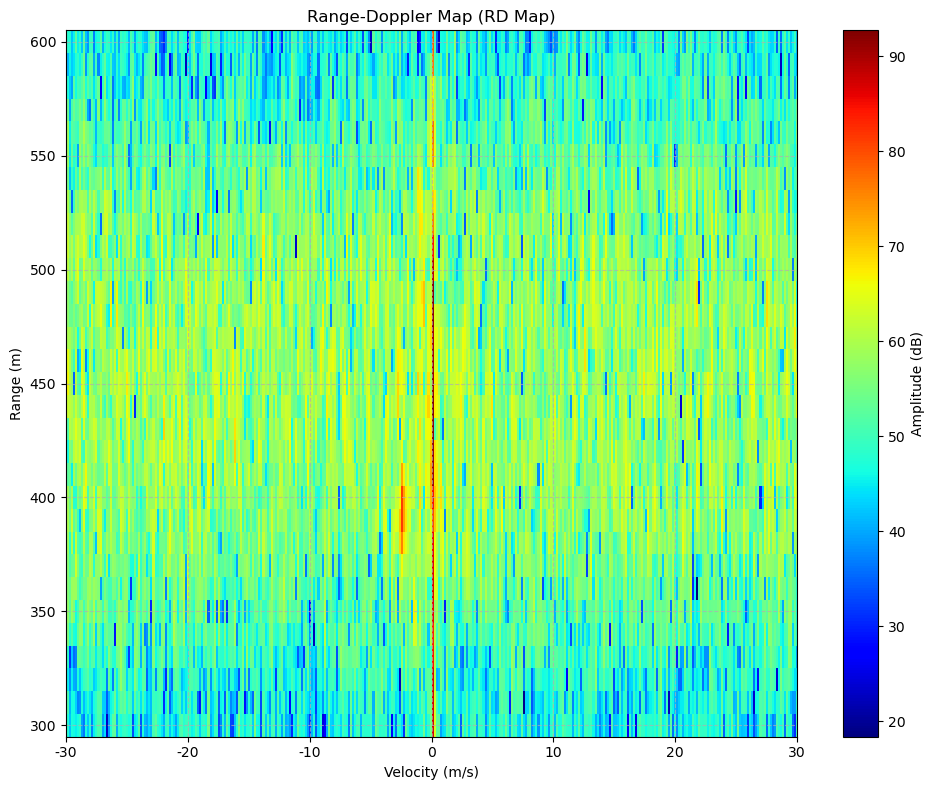

In [ ]:
# 修复后的代码 - 解决文件路径和中文显示问题
import scipy.io
import os
import numpy as np
from math import sqrt, log10
from matplotlib import pyplot as plt
import matplotlib as mpl

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

def check_path(path):
    """修复路径检查函数"""
    if path and os.path.dirname(path):  # 只有当路径包含目录时才创建
        dir_path = os.path.dirname(path)
        if not os.path.exists(dir_path):
            os.makedirs(dir_path)

def visualize_rd_matrix_scipy(data, save_path=None):
    """使用scipy读取的数据可视化RD矩阵，模拟参考代码效果"""
    
    # 从scipy读取的数据中提取MTD结果
    rd_matrix = data['data_proc_MTD_result']
    
    # 创建假设的物理坐标轴（根据实际雷达参数调整）
    range_bins, velocity_bins = rd_matrix.shape
    
    # 假设的物理参数 - 您可以根据实际情况调整这些值
    range_start = 300        # 起始距离(米)
    range_step = 10          # 距离分辨率(米)
    velocity_max = 30        # 最大速度(m/s)
    
    # 创建物理坐标轴
    range_axis = np.arange(range_bins) * range_step + range_start
    velocity_axis = np.linspace(-velocity_max, velocity_max, velocity_bins)
    
    # 计算幅度值（使用更高效的numpy操作）
    if np.iscomplexobj(rd_matrix):
        # 使用numpy的向量化操作，比循环快很多
        amplitude = np.abs(rd_matrix)
        value = 20 * np.log10(amplitude + 1e-10)
    else:
        value = 20 * np.log10(np.abs(rd_matrix) + 1e-10)

    print(f"RD矩阵形状: {rd_matrix.shape}")
    print(f"距离轴长度: {len(range_axis)}")
    print(f"速度轴长度: {len(velocity_axis)}")
    print(f"距离范围: {range_axis[0]:.1f} - {range_axis[-1]:.1f} 米")
    print(f"速度范围: {velocity_axis[0]:.1f} - {velocity_axis[-1]:.1f} m/s")

    # 创建图形（完全模拟参考代码的样式）
    plt.figure(figsize=(10, 8))

    # 使用meshgrid创建坐标网格
    X, Y = np.meshgrid(velocity_axis, range_axis)
    
    # 使用pcolormesh绘制，与参考代码一致
    plt.pcolormesh(X, Y, value, shading='auto', cmap='jet')
    plt.xlim(-30, 30)  # 限制速度显示范围
    plt.colorbar(label='Amplitude (dB)')  # 使用英文避免字体问题
    plt.xlabel('Velocity (m/s)')
    plt.ylabel('Range (m)')
    plt.title('Range-Doppler Map (RD Map)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    if save_path:
        check_path(save_path)
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"图片已保存到: {save_path}")
    else:
        plt.show()

# 使用您的数据文件
mat_file = './Batch_3115_Label_6_Frame_59/MTD_Result.mat'

# 使用scipy读取数据
data = scipy.io.loadmat(mat_file)

# 可视化RD矩阵 - 直接保存到当前目录
visualize_rd_matrix_scipy(data, save_path='rd_map_scipy_style.png')

图片已保存到: improved_rd_map.png


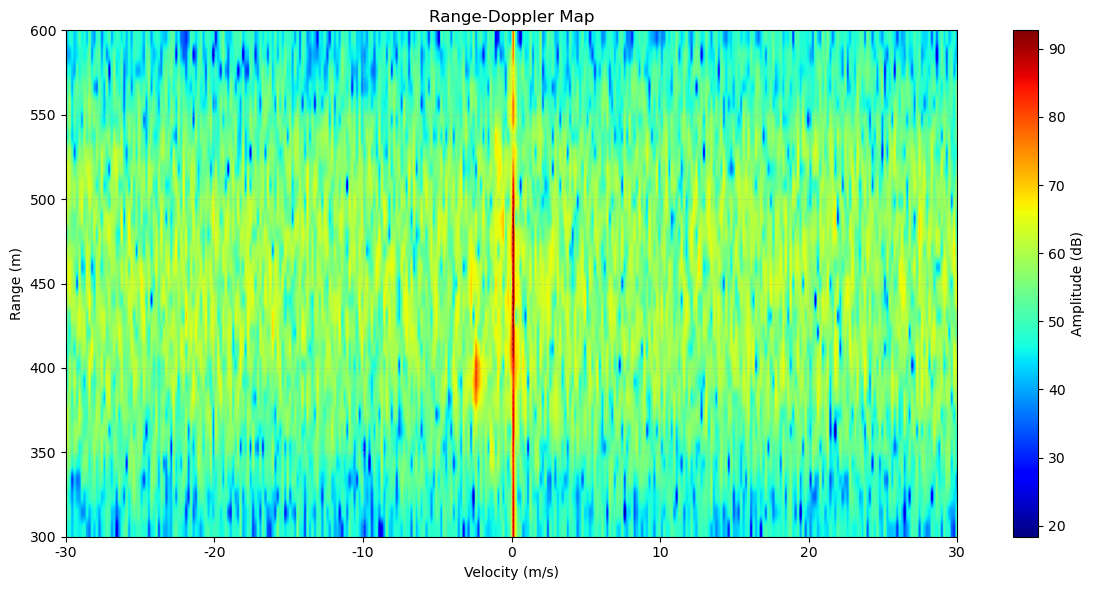

In [8]:
# 不插值，只调整显示效果
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

def plot_better_rd_map(data, save_path=None):
    """改进的RD图显示，不使用插值"""
    
    mtd_data = data['data_proc_MTD_result']
    
    # 物理参数设置
    range_bins, velocity_bins = mtd_data.shape
    range_start, range_step = 300, 10
    velocity_max = 30
    
    # 创建坐标轴
    range_axis = np.arange(range_bins) * range_step + range_start
    velocity_axis = np.linspace(-velocity_max, velocity_max, velocity_bins)
    
    # 计算dB值
    power_db = 20 * np.log10(np.abs(mtd_data) + 1e-10)
    
    # 关键：使用合适的图像尺寸和DPI
    fig, ax = plt.subplots(figsize=(12, 6))  # 调整宽高比
    
    # 使用imshow而不是pcolormesh，效果更清晰
    im = ax.imshow(power_db, 
                   aspect='auto',  # 自动调整纵横比
                   cmap='jet',
                   origin='lower',
                   extent=[-velocity_max, velocity_max, range_axis[0], range_axis[-1]])
    
    # 设置显示范围
    ax.set_xlim(-30, 30)
    ax.set_ylim(range_axis[0], range_axis[-1])
    
    # 添加colorbar和标签
    cbar = plt.colorbar(im, ax=ax, label='Amplitude (dB)')
    ax.set_xlabel('Velocity (m/s)')
    ax.set_ylabel('Range (m)')
    ax.set_title('Range-Doppler Map')
    ax.grid(True, linestyle='--', alpha=0.3)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=150, bbox_inches='tight')  # 适中的DPI
        print(f"图片已保存到: {save_path}")
    else:
        plt.show()

# 使用改进的显示方法
mat_file = './Batch_3115_Label_6_Frame_59/MTD_Result.mat'
data = scipy.io.loadmat(mat_file)
plot_better_rd_map(data, 'improved_rd_map.png')